# 대중교통 데이터 읽어오기

In [2]:
import csv
f=open('../Data/subwayfee.csv', encoding='utf-8')
data=csv.reader(f)
header=next(data)
print(header)
i=0
for row in data:
    print(row)
    if i>5:
        break
    i+=1
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '1호선', '150', '서울역', '1150754', '1123193', '194717', '187155']
['Jun-22', '1호선', '151', '시청', '537067', '543569', '80671', '78279']
['Jun-22', '1호선', '152', '종각', '834173', '815704', '131987', '121717']
['Jun-22', '1호선', '153', '종로3가', '450317', '404106', '299617', '278151']
['Jun-22', '1호선', '154', '종로5가', '394420', '404105', '254236', '244555']
['Jun-22', '1호선', '155', '동대문', '212719', '198987', '117499', '118515']
['Jun-22', '1호선', '156', '신설동', '264825', '252339', '112362', '106855']


### 유임승차 대 무임승차 비율이 가장 높은 역은?
 - $rate= {유임승차인원 \over 무임승차인원}$

In [3]:
# 무임승차인원 0일때 에러

f=open('../Data/subwayfee.csv', encoding='utf-8')
data=csv.reader(f)
next(data)
max_rate=0
rate=0

# for row in data:
#     for i in range(4,8):
#         row[i]=int(row[i])
#     rate=row[4]/row[6]      # 0으로 나누기 에러
#     if rate>max_rate:
#         max_rate=rate
# print(max_rate)

f.close()

- 무임승차 인원이 0인 역 찾기

In [4]:
f=open('../Data/subwayfee.csv', encoding='utf-8')
data=csv.reader(f)
next(data)
max_rate=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    rate=row[4]/(row[4]+row[6])

    if row[6]==0:               # 무임승차인원이 0인 역 출력
        print(row)
f.close()

['Jun-22', '일산선', '1949', '지축', 10, 0, 0, 0]
['Jun-22', '경의선', '1296', '계양', 10, 0, 0, 0]
['Jun-22', '경의선', '1297', '검암', 2, 0, 0, 0]
['Jun-22', '6호선', '2615', '연신내', 31, 0, 0, 0]
['Jun-22', '6호선', '2649', '신내', 4, 0, 0, 0]
['Jun-22', '7호선', '2753', '까치울', 1, 0, 0, 0]
['Jun-22', '7호선', '2758', '상동', 1, 0, 0, 0]
['Jun-22', '7호선', '2761', '부평구청', 1, 0, 0, 0]


- $rate= {무임승차인원 \over 무임+유임승차인원}$

In [5]:
f=open('../Data/subwayfee.csv', encoding='utf-8')
data=csv.reader(f)
next(data)
max_rate=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    
    if row[6]!=0:
        rate=(row[6]*100)/(row[4]+row[6])

        if rate>max_rate:
            max_rate=rate
            print(row, round(rate,2),'%')  # 무임승차 %가 최고인 역을 찾는 과정 출력

f.close()

['Jun-22', '1호선', '150', '서울역', 1150754, 1123193, 194717, 187155] 14.47 %
['Jun-22', '1호선', '153', '종로3가', 450317, 404106, 299617, 278151] 39.95 %
['Jun-22', '1호선', '157', '제기동', 218782, 209109, 263173, 281985] 54.61 %
['Jun-22', '경원선', '1916', '소요산', 32659, 25998, 62990, 56806] 65.86 %
['Jun-22', '7호선', '2756', '신중동', 0, 0, 1, 0] 100.0 %


### 10만명이 넘게 승하차하는 역에서 유임승차 비율이 높은 역
- $rate= {유임승차인원 \over 무임+유임승차인원}$

In [6]:
f=open('../Data/subwayfee.csv', encoding='utf-8')
data=csv.reader(f)
next(data)
max_rate=0
rate=0
max_row=[]
total_count=0
max_total_num=0


for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    
    total_count=row[4]+row[6]

    if (row[6]!=0) and (total_count>100000):
        rate=row[4]/total_count

        if rate>max_rate:
            max_rate=rate
            max_row=row
            max_total_num=total_count

print(max_row)
print("역이름 : {}, 전체인원 : {}, 유임승차인원 : {:,}, 유임승차 비율 : {}".format(max_row[3], max_total_num,max_row[4],round(max_rate,2)))


f.close()

['Jun-22', '2호선', '209', '한양대', 269240, 295829, 12481, 13227]
역이름 : 한양대, 전체인원 : 281721, 유임승차인원 : 269,240, 유임승차 비율 : 0.96


- 유임승차 비율이 50% 이하이고 총 승차인원이 10000명 이상
- 유임승차 비율이 가장 낮은 역의 비율을 파이차트로 표시

In [7]:
f=open('../Data/subwayfee.csv', encoding='utf-8')
data=csv.reader(f)
header=next(data)
print(header)
min_rate=100
rate=0
min_row=[]
total_count=0
min_total_num=0


for row in data:
    for i in [4,6]:          #유임승차, 무임승차 데이터만 가져옴
        row[i]=int(row[i])
    
    total_count=row[4]+row[6]

    if (row[6]!=0) and (total_count>10000):
        rate=row[4]/total_count
        if rate<=0.5:
            print(row,round(rate,2))

            if rate<min_rate:
                min_rate=rate
                min_row=row
                min_total_num=total_count

print("역이름 : {}, 전체인원 : {:,}, 유임승차인원 : {:,}, 유임승차 비율 : {}".format(min_row[3], min_total_num,min_row[4],round(min_rate,2)))

f.close()



['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '1호선', '157', '제기동', 218782, '209109', 263173, '281985'] 0.45
['Jun-22', '1호선', '159', '동묘앞', 122460, '131299', 146455, '147539'] 0.46
['Jun-22', '경원선', '1916', '소요산', 32659, '25998', 62990, '56806'] 0.34
['Jun-22', '중앙선', '1218', '원덕', 5854, '5749', 6959, '6739'] 0.46
['Jun-22', '중앙선', '1219', '용문', 34168, '34477', 38467, '38202'] 0.47
역이름 : 소요산, 전체인원 : 95,649, 유임승차인원 : 32,659, 유임승차 비율 : 0.34


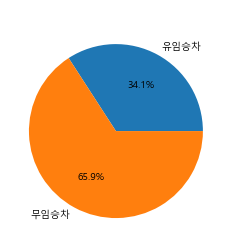

In [40]:
# 그래프 그리기

import matplotlib
import matplotlib.pyplot as plt
import platform


# 한글 글꼴
if(platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')


plt.title(min_row[3] + " 유,무임 승차 비율") # fontdict={'color': rcParams['axes.titlecolor']}
label = ['유임승차', '무임승차']

# 제목 색 변경
#plt.rcParams['axes.titlecolor'] = "w"
# 라벨변경?? 못찾았음 
# plt.rcParams['axes.labelcolor'] = "w"


values = [min_row[4], min_row[6]]

# auto percentage 
## %.1f : 소수점 첫째자리까지 출력,%% : 특수기호이기때문에 출력을 위해 2번 입력

plt.pie(values, labels=label, autopct='%.1f%%') 
plt.show()


### 승하차 인원이 가장 많은 역

In [9]:
max=[0]*4
max_station=['']*4
label=['유임승차','유임하차','무임승차','무임하차']

# with 구문 : 자동으로 파일을 close()시킹
with open('../Data/subwayfee.csv', encoding='utf-8') as f:
    data=csv.reader(f)
    next(data)

    for row in data:
        for i in range(4,8):
            row[i]=int(row[i])
            if row[i]>max[i-4]:
                max[i-4]=row[i]
                max_station[i-4]=row[3]+' '+row[1]

for i in range(4):
    print('{0} : {1} {2:,}'.format(label[i],max_station[i],max[i]))

유임승차 : 강남 2호선 2,055,521
유임하차 : 강남 2호선 2,039,847
무임승차 : 종로3가 1호선 299,617
무임하차 : 제기동 1호선 281,985


### 전체 지하철 역 파이차트 분석
 - 파일저장 : savefig('파일이름',dpi)

In [10]:
label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF'] # 파이차트 컬러 값
pic_count = 0

with open('../Data/subwayfee.csv', encoding='utf-8') as f:
    data = csv.reader(f)
    next(data)

    # 한글 글꼴
    if(platform.system() == 'Windows'):
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')

    for row in data:
        for i in range(4,8):
            row[i]=int(row[i])

        plt.figure(dpi=200)           # 저장할 그림파일의 dpi 설정
        plt.title(row[3] + ' ' + row[1])
        plt.pie(row[4:8], labels=label, colors=c, autopct = '%.1f%%')
        plt.savefig(row[3]+' '+row[1]+'.png')
        plt.close()    # 파일닫기


        # 10개만 만들기
        pic_count+=1
        if pic_count>=10:
            break